<a href="https://colab.research.google.com/github/nssn96/overfitting/blob/main/Nadhamuni_Suresh_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[blog page](https://nssn96.github.io/) ---> Blog 3 under the BLOGS section

# **PART A** --> Generating data points

In [ ]:
# Import statements
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

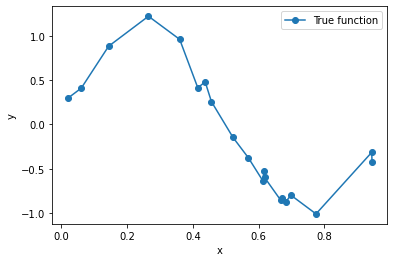

In [ ]:
# function for the sine
def true_function(x,N):
    return np.sin(2.0 * np.pi * x) + (N*0.1)

np.random.seed(0)
total_size = 20
N = np.random.normal(0.0,1.0,total_size)
x = np.sort(np.random.uniform(0.0,1.0,total_size))
y = true_function(x,N)

# to plot x and y

# plotting the points 
plt.plot(x,y,label='True function',marker='o')
  
# naming the axes
plt.xlabel('x')
plt.ylabel('y')

# function to show the plot
plt.legend()
plt.show()


Spliting the data into train and test set

In [ ]:
# To split the 20 data into train and test
x_train,x_test = np.split(x, 2)
N_train, N_test = np.split(N, 2) 

y_train = true_function(x_train,N_train)
y_test = true_function(x_test, N_test)

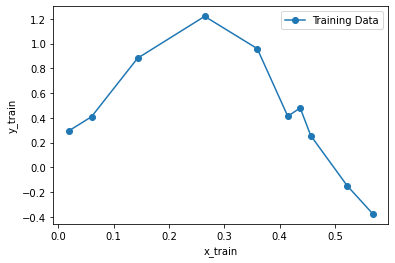

In [ ]:
# Plot x_train vs y_train and x_test vs y_test

plt.tight_layout()
plt.plot(x_train, y_train, label="Training Data", marker='o')
plt.xlabel("x_train")
plt.ylabel("y_train")
plt.legend()

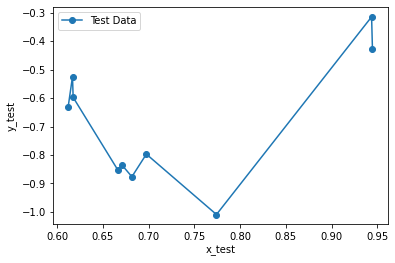

In [ ]:
plt.tight_layout()
plt.plot(x_test, y_test, label="Test Data", marker='o')
plt.xlabel("x_test")
plt.ylabel("y_test")
plt.legend()

# **PART B**-->Using root mean square error, find weights of polynomial regression for order is 0, 1, 3, 9

In [ ]:
#
plt.figure(figsize=(15, 6))
order = np.array([0, 1, 3, 9])
loss_train = []
loss_test = []
w = []
for i in range(len(order)):
    # axes = plt.subplot(1, len(order), i + 1)
    # plt.setp(axes, xticks=(), yticks=())
    l_reg = LinearRegression()
    pipeline = make_pipeline(PolynomialFeatures(order[i]), l_reg)
    pipeline.fit(x_train[:, np.newaxis], y_train)

    w.append(l_reg.coef_)

    pred_train = pipeline.predict(x_train[:, np.newaxis])
    loss_train.append(math.sqrt(mean_squared_error(y_train, pred_train)))

    pred_test = pipeline.predict(x_test[:, np.newaxis])
    loss_test.append(math.sqrt(mean_squared_error(y_train, pred_test)))

<Figure size 1080x432 with 0 Axes>

# **PART C**--> Display weights in table 

In [ ]:
w_label = ['w0','w1','w2','w3','w4','w5','w6','w7','w8','w9']
column = []
for i in order:
  column.append('Degree='+str(i))
table_regularize = pd.DataFrame(w, columns=w_label, index=column)
table_regularize.fillna("")

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9
Degree=0,0.0,,,,,,,,,
Degree=1,0.0,-1.16378,,,,,,,,
Degree=3,0.0,10.545,-28.0027,14.2426,,,,,,
Degree=9,0.0,-4939.68,139966,-1.80992e+06,1.27296e+07,-5.29422e+07,1.34129e+08,-2.03575e+08,1.70258e+08,-6.0369e+07


# **PART D**--> chart of fit data

**Degree 0**

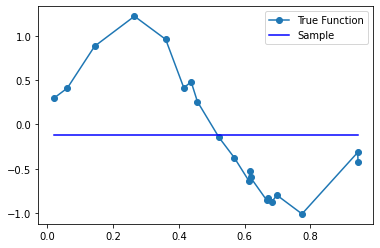

In [ ]:
x=x.reshape((-1,1))
p_reg = PolynomialFeatures(degree = 0)
x_p = p_reg.fit_transform(x)
p_reg.fit(x_p, y)
lin_reg = LinearRegression()
lin_reg.fit(x_p, y)
plt.figure(0)
plt.plot(x,y,marker='o',label='True Function')
plt.plot(x, lin_reg.predict(p_reg.fit_transform(x)), color = 'blue',label='Sample')
#plt.scatter(x,y)
plt.legend()


**Degree 1**

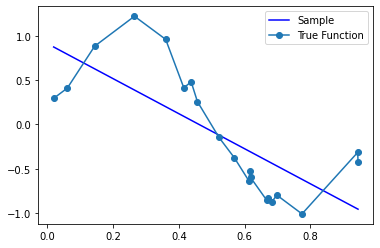

In [ ]:

x=x.reshape((-1,1))
p_reg = PolynomialFeatures(degree = 1)
x_p = p_reg.fit_transform(x)
p_reg.fit(x_p, y)
lin_reg = LinearRegression()
lin_reg.fit(x_p, y)
plt.figure(0)
plt.plot(x, lin_reg.predict(p_reg.fit_transform(x)), color = 'blue',label='Sample')
#plt.scatter(x,y)
plt.plot(x,y,marker='o',label='True Function')
plt.legend()

**Degree 3**

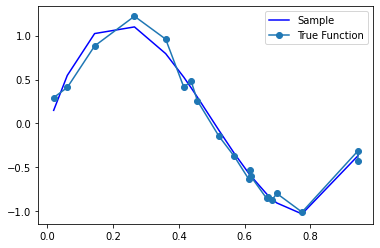

In [ ]:

x=x.reshape((-1,1))
p_reg = PolynomialFeatures(degree = 3)
x_p = p_reg.fit_transform(x)
p_reg.fit(x_p, y)
lin_reg = LinearRegression()
lin_reg.fit(x_p, y)
plt.figure(0)
plt.plot(x, lin_reg.predict(p_reg.fit_transform(x)), color = 'blue',label='Sample')
#plt.scatter(x,y)

plt.plot(x,y,marker='o',label='True Function')
plt.legend()

**Degree 9**

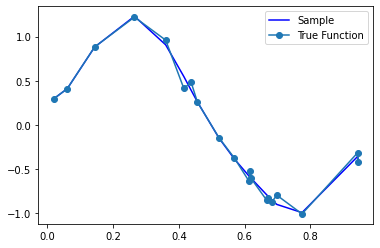

In [ ]:

x=x.reshape((-1,1))
p_reg = PolynomialFeatures(degree = 9)
x_p = p_reg.fit_transform(x)
p_reg.fit(x_p, y)
lin_reg = LinearRegression()
lin_reg.fit(x_p, y)
plt.figure(0)
plt.plot(x, lin_reg.predict(p_reg.fit_transform(x)), color = 'blue',label='Sample')
#plt.scatter(x,y)

plt.plot(x,y,marker='o',label='True Function')
plt.legend()

# **PART E--->  Draw train error vs test error**

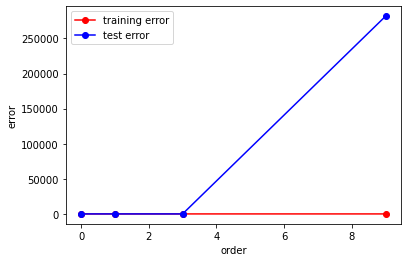

In [ ]:
plt.figure()
plt.plot(order, loss_train, label='training error', marker='o', color='r')
plt.plot(order, loss_test, label='test error', marker='o', color='b')
plt.xlabel("order")
plt.ylabel("error")
plt.legend()
plt.show()

# **PART F**-->generate 100 more data and fit 9th order model and draw fit

Order = 9
Coeff:  [ 0.00000000e+00  7.71547896e+00  1.52941782e+00 -1.90534837e+02
  1.06147622e+03 -3.38357420e+03  6.23401752e+03 -6.46645528e+03
  3.52406162e+03 -7.88125864e+02]
Intercept:  -0.1089012869782214


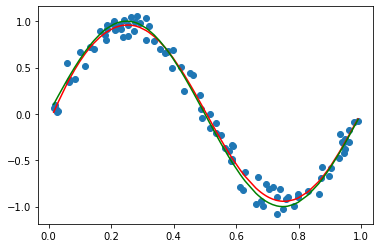

In [ ]:
total_size = 100
N = np.random.normal(0.0,1.0,total_size)
x = np.sort(np.random.uniform(0.0,1.0,total_size))
y = true_function(x,N)

#%% Fitting Polynomial Regression to the dataset
x=x.reshape((-1,1))
p_reg = PolynomialFeatures(degree = 9)
x_p = p_reg.fit_transform(x)
p_reg.fit(x_p, y)
lin_reg = LinearRegression()
lin_reg.fit(x_p, y)
plt.figure(3)
plt.plot(x, lin_reg.predict(p_reg.fit_transform(x)), color = 'red',label='Sample')
plt.scatter(x,y)
plt.plot(x,np.sin(2*np.pi*x),color='green')

print('Order = 9')
print('Coeff: ',str(lin_reg.coef_))
print('Intercept: ',str(lin_reg.intercept_))

# **PART H**--> h.	Draw chart for lambda is 1, 1/10, 1/100, 1/1000, 1/10000, 1/100000 

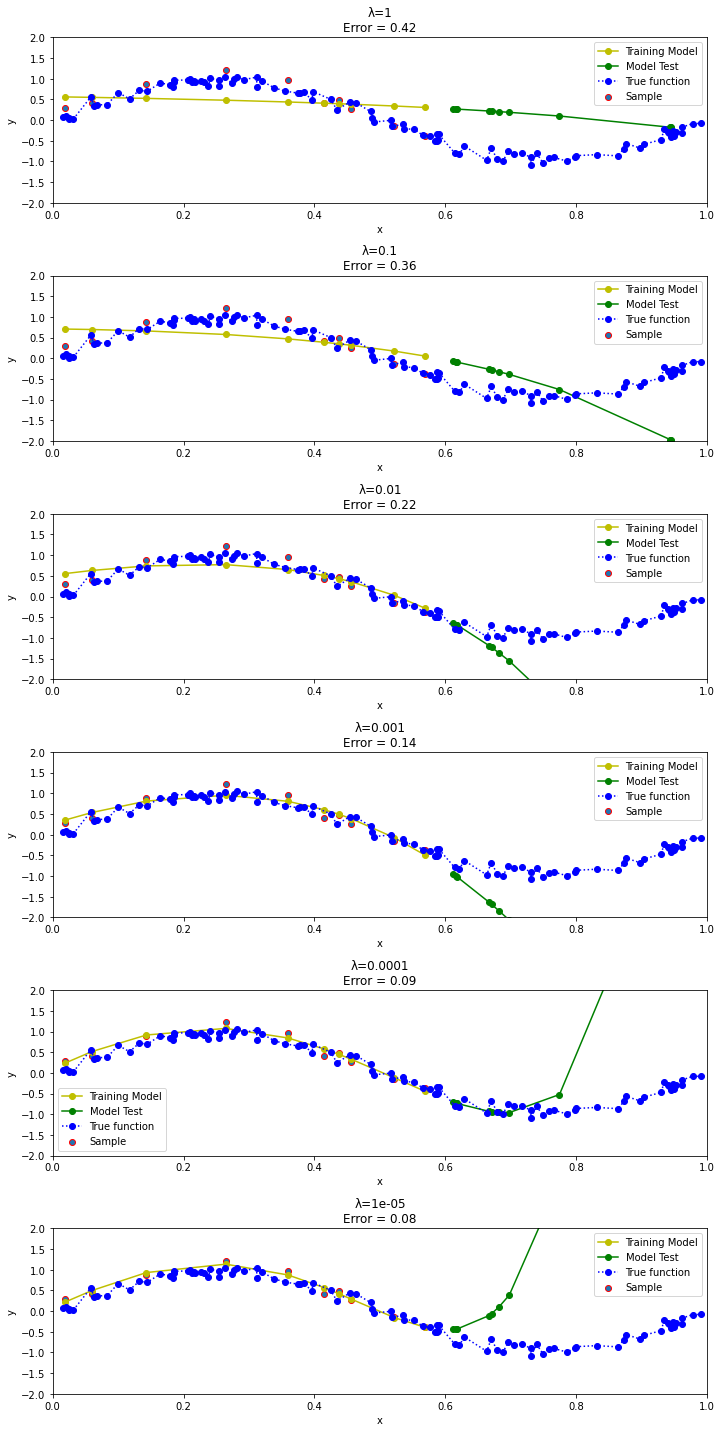

In [ ]:
alphas = [1, 1/10, 1/100, 1/1000, 1/10000, 1/100000]
fig, axs = plt.subplots(len(alphas), figsize=(10, 20))
order = 9
loss_train = []
loss_test = []
w = []

for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  pipeline = make_pipeline(PolynomialFeatures(order), ridge)
  pipeline.fit(x_train[:, np.newaxis], y_train)

  w.append(list(ridge.coef_))

  pred_train = pipeline.predict(x_train[:, np.newaxis])
  loss_train.append(math.sqrt(mean_squared_error(y_train, pred_train)))

  pred_test = pipeline.predict(x_test[:, np.newaxis])
  loss_test.append(math.sqrt(mean_squared_error(y_train, pred_test)))

  axs[alphas.index(alpha)].plot(x_train, pred_train, label="Training Model", marker='o', color='y')
  axs[alphas.index(alpha)].plot(x_test, pred_test, label="Model Test", marker='o', color='g')
  axs[alphas.index(alpha)].plot(x, y, label="True function", linestyle=':', marker='o', color='b')
  axs[alphas.index(alpha)].scatter(x_train, y_train, label="Sample",edgecolors='r')
  axs[alphas.index(alpha)].set_xlabel("x")
  axs[alphas.index(alpha)].set_ylabel("y")
  axs[alphas.index(alpha)].set_xlim((0, 1))
  axs[alphas.index(alpha)].set_ylim((-2, 2))
  axs[alphas.index(alpha)].set_title("λ={}\nError = {:.2f}".format(alpha, loss_train[alphas.index(alpha)]))
  axs[alphas.index(alpha)].legend(loc="best")
fig.tight_layout()
fig.show()

# **PART I**--> i.	Now draw test  and train error according to lamda 

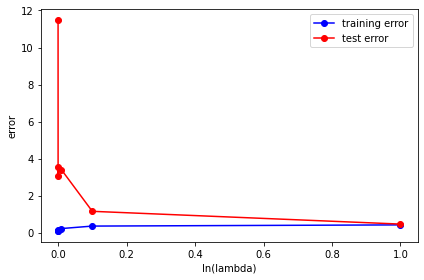

In [ ]:
plt.figure()
plt.plot(alphas, loss_train, label='training error', marker='o', color='b')
plt.plot(alphas, loss_test, label='test error', marker='o', color='r')
plt.xlabel("ln(lambda)")
plt.ylabel("error")
plt.legend()
plt.tight_layout()
plt.show()